# [COM4513-6513] Assignment 1: Text Classification with Logistic Regression

### Instructor: Nikos Aletras


The goal of this assignment is to develop and test two text classification systems: 

- **Task 1:** sentiment analysis, in particular to predict the sentiment of movie review, i.e. positive or negative (binary classification).
- **Task 2:** topic classification, to predict whether a news article is about International issues, Sports or Business (multiclass classification).


For that purpose, you will implement:

- Text processing methods for extracting Bag-Of-Word features, using (1) unigrams, bigrams and trigrams to obtain vector representations of documents. Two vector weighting schemes should be tested: (1) raw frequencies (**3 marks; 1 for each ngram type**); (2) tf.idf (**1 marks**). 
- Binary Logistic Regression classifiers that will be able to accurately classify movie reviews trained with (1) BOW-count (raw frequencies); and (2) BOW-tfidf (tf.idf weighted) for Task 1. 
- Multiclass Logistic Regression classifiers that will be able to accurately classify news articles trained with (1) BOW-count (raw frequencies); and (2) BOW-tfidf (tf.idf weighted) for Task 2. 
- The Stochastic Gradient Descent (SGD) algorithm to estimate the parameters of your Logistic Regression models. Your SGD algorithm should:
    - Minimise the Binary Cross-entropy loss function for Task 1 (**3 marks**)
    - Minimise the Categorical Cross-entropy loss function for Task 2 (**3 marks**)
    - Use L2 regularisation (both tasks) (**1 mark**)
    - Perform multiple passes (epochs) over the training data (**1 mark**)
    - Randomise the order of training data after each pass (**1 mark**)
    - Stop training if the difference between the current and previous validation loss is smaller than a threshold (**1 mark**)
    - After each epoch print the training and development loss (**1 mark**)
- Discuss how did you choose hyperparameters (e.g. learning rate and regularisation strength)?  (**2 marks; 0.5 for each model in each task**).
- After training the LR models, plot the learning process (i.e. training and validation loss in each epoch) using a line plot (**1 mark; 0.5 for both BOW-count and BOW-tfidf LR models in each task**) and discuss if your model overfits/underfits/is about right.
- Model interpretability by showing the most important features for each class (i.e. most positive/negative weights). Give the top 10 for each class and comment on whether they make sense (if they don't you might have a bug!).  If we were to apply the classifier we've learned into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain? (**2 marks; 0.5 for BOW-count and BOW-tfidf LR models respectively in each task**)


### Data - Task 1 

The data you will use for Task 1 are taken from here: [http://www.cs.cornell.edu/people/pabo/movie-review-data/](http://www.cs.cornell.edu/people/pabo/movie-review-data/) and you can find it in the `./data_sentiment` folder in CSV format:

- `data_sentiment/train.csv`: contains 1,400 reviews, 700 positive (label: 1) and 700 negative (label: 0) to be used for training.
- `data_sentiment/dev.csv`: contains 200 reviews, 100 positive and 100 negative to be used for hyperparameter selection and monitoring the training process.
- `data_sentiment/test.csv`: contains 400 reviews, 200 positive and 200 negative to be used for testing.

### Data - Task 2

The data you will use for Task 2 is a subset of the [AG News Corpus](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html) and you can find it in the `./data_topic` folder in CSV format:

- `data_topic/train.csv`: contains 2,400 news articles, 800 for each class to be used for training.
- `data_topic/dev.csv`: contains 150 news articles, 50 for each class to be used for hyperparameter selection and monitoring the training process.
- `data_topic/test.csv`: contains 900 news articles, 300 for each class to be used for testing.


### Submission Instructions

You should submit a Jupyter Notebook file (assignment1.ipynb) and an exported PDF version (you can do it from Jupyter: `File->Download as->PDF via Latex`).

You are advised to follow the code structure given in this notebook by completing all given funtions. You can also write any auxilliary/helper functions (and arguments for the functions) that you might need but note that you can provide a full solution without any such functions. Similarly, you can just use only the packages imported below but you are free to use any functionality from the [Python Standard Library](https://docs.python.org/2/library/index.html), NumPy, SciPy and Pandas. You are not allowed to use any third-party library such as Scikit-learn (apart from metric functions already provided), NLTK, Spacy, Keras etc..

Please make sure to comment your code. You should also mention if you've used Windows (not recommended) to write and test your code. There is no single correct answer on what your accuracy should be, but correct implementations usually achieve F1-scores around 80\% or higher. The quality of the analysis of the results is as important as the accuracy itself. 

This assignment will be marked out of 20. It is worth 20\% of your final grade in the module.

The deadline for this assignment is **23:59 on Fri, 20 Mar 2020** and it needs to be submitted via MOLE. Standard departmental penalties for lateness will be applied. We use a range of strategies to detect [unfair means](https://www.sheffield.ac.uk/ssid/unfair-means/index), including Turnitin which helps detect plagiarism, so make sure you do not plagiarise.



In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random

# fixing random seed for reproducibility
random.seed(123)
np.random.seed(123)


## Load Raw texts and labels into arrays

First, you need to load the training, development and test sets from their corresponding CSV files (tip: you can use Pandas dataframes).

In [2]:
# fill in your code...
data_dev = pd.read_csv('./data_sentiment/dev.csv', names = ['text','label'])
data_test = pd.read_csv('./data_sentiment/test.csv', names = ['text','label'])
data_train = pd.read_csv('./data_sentiment/train.csv', names = ['text','label'])

If you use Pandas you can see a sample of the data.

In [3]:
data_dev

,text,label
0,"if he doesn=92t watch out , mel gibson is in d...",1
1,"wong kar-wei's "" fallen angels "" is , on a pur...",1
2,there is nothing like american history x in th...,1
3,"an unhappy italian housewife , a lonely waiter...",1
4,"when people are talking about good old times ,...",1
...,...,...
195,"tri-star ; rated r ( language , sexual situati...",0
196,fact that charles bronson represents one of th...,0
197,"the above is dialogue from this film , taken a...",0
198,"in the interest of being generous , i want to ...",0


The next step is to put the raw texts into Python lists and their corresponding labels into NumPy arrays:


In [4]:
# fill in your code...
data_dev_text = list(data_dev['text'])                  #text to store raw text in python lists   
data_dev_label = data_dev['label'].values               #label to store corresponding labels in numpy arrays

data_test_text = list(data_test['text'])                    
data_test_label = data_test['label'].values 

data_train_text = list(data_train['text'])                    
data_train_label = data_train['label'].values 

# Bag-of-Words Representation 


To train and test Logisitc Regression models, you first need to obtain vector representations for all documents given a vocabulary of features (unigrams, bigrams, trigrams).


## Text Pre-Processing Pipeline

To obtain a vocabulary of features, you should: 
- tokenise all texts into a list of unigrams (tip: using a regular expression) 
- remove stop words (using the one provided or one of your preference) 
- compute bigrams, trigrams given the remaining unigrams
- remove ngrams appearing in less than K documents
- use the remaining to create a vocabulary of unigrams, bigrams and trigrams (you can keep top N if you encounter memory issues).


In [5]:
stop_words = ['a','in','on','at','and','or', 
              'to', 'the', 'of', 'an', 'by', 
              'as', 'is', 'was', 'were', 'been', 'be', 
              'are','for', 'this', 'that', 'these', 'those', 'you', 'i',
             'it', 'he', 'she', 'we', 'they' 'will', 'have', 'has',
              'do', 'did', 'can', 'could', 'who', 'which', 'what', 
             'his', 'her', 'they', 'them', 'from', 'with', 'its']

### N-gram extraction from a document

You first need to implement the `extract_ngrams` function. It takes as input:
- `x_raw`: a string corresponding to the raw text of a document
- `ngram_range`: a tuple of two integers denoting the type of ngrams you want to extract, e.g. (1,2) denotes extracting unigrams and bigrams.
- `token_pattern`: a string to be used within a regular expression to extract all tokens. Note that data is already tokenised so you could opt for a simple white space tokenisation.
- `stop_words`: a list of stop words
- `vocab`: a given vocabulary. It should be used to extract specific features.

and returns:

- a list of all extracted features.

See the examples below to see how this function should work.

In [6]:
def extract_ngrams(x_raw, ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b', stop_words=[], vocab=None):
    
    # fill in your code...
    filtered_word_list = []
    #regularization first
    token_word_list = re.findall(token_pattern,x_raw)
    #stop words removal
    stopped_word_list = []
    for word in token_word_list:
        if word not in stop_words:          #if word not in stoplist, add it
            stopped_word_list.append(word)
    #        
    ngram = []
    for grams in range(ngram_range[0] , ngram_range[1] + 1):       #input is range(1,3), but we need 3 grams
        if grams == 1:                                             #ensure single word is 'great' not ['great']
            for i in range(len(stopped_word_list) - (grams - 1)):
                ngram = ngram + stopped_word_list[i : i + grams]
        else:                   
            for i in range(len(stopped_word_list) - (grams - 1)):
                ngram.append(tuple(stopped_word_list[i : i + grams]))     #this is how to append n gram element using tuple
    if vocab == None:
        return ngram
    else:
        ngram = [item for item in ngram if item in vocab]      #set the out put according to vocab input
        return ngram




In [7]:
extract_ngrams("this is a great movie to watch", 
               ngram_range=(1,3), 
               stop_words=stop_words)

['great',
 'movie',
 'watch',
 ('great', 'movie'),
 ('movie', 'watch'),
 ('great', 'movie', 'watch')]

In [8]:
extract_ngrams("this is a great movie to watch", 
               ngram_range=(1,2), 
               stop_words=stop_words, 
               vocab=set(['great', ('great','movie')]))

['great', ('great', 'movie')]

Note that it is OK to represent n-grams using lists instead of tuples: e.g. `['great', ['great', 'movie']]`

### Create a vocabulary of n-grams

Then the `get_vocab` function will be used to (1) create a vocabulary of ngrams; (2) count the document frequencies of ngrams; (3) their raw frequency. It takes as input:
- `X_raw`: a list of strings each corresponding to the raw text of a document
- `ngram_range`: a tuple of two integers denoting the type of ngrams you want to extract, e.g. (1,2) denotes extracting unigrams and bigrams.
- `token_pattern`: a string to be used within a regular expression to extract all tokens. Note that data is already tokenised so you could opt for a simple white space tokenisation.
- `stop_words`: a list of stop words
- `vocab`: a given vocabulary. It should be used to extract specific features.
- `min_df`: keep ngrams with a minimum document frequency.
- `keep_topN`: keep top-N more frequent ngrams.

and returns:

- `vocab`: a set of the n-grams that will be used as features.
- `df`: a Counter (or dict) that contains ngrams as keys and their corresponding document frequency as values.
- `ngram_counts`: counts of each ngram in vocab

Hint: it should make use of the `extract_ngrams` function.

In [9]:
def get_vocab(X_raw, ngram_range=(1,3), token_pattern=r'\b[A-Za-z][A-Za-z]+\b', min_df=0, keep_topN=0, stop_words=[]):
    list_ngram = []
    list_vocab = []
    ngram_counts = []
    #extract ngrams from X_raw
    for i in range(len(X_raw)):
    #turning it into set to avoid one ngram repeation in a text.   eg.'good' appears twice in a text bur we count it once
        list_ngram = list_ngram + list(set(extract_ngrams(data_train_text[i], ngram_range, token_pattern, stop_words)))
    #count how many times each ngram appears using Counter
    df_raw = Counter(list_ngram)
    #keep ngrams more than min_df
    dic_df_raw = dict(df_raw)
    dic_df_filtered = {}
    for key in dic_df_raw:
        if dic_df_raw[key] > min_df:   
            dic_df_filtered[key] = dic_df_raw[key]
    filtered_df = Counter(dic_df_filtered)
    #keep top-N more frequent ngrams
    list_df = filtered_df.most_common(keep_topN)
    #get topN vocab
    vocab = [list_df[i][0] for i in range(len(list_df))]

    return vocab, filtered_df, ngram_counts

Now you should use `get_vocab` to create your vocabulary and get document and raw frequencies of n-grams:

In [10]:
vocab, df, ngram_counts = get_vocab(data_train_text, ngram_range=(1,3), keep_topN=5000, stop_words=stop_words)
print(len(vocab))
print()
print(list(vocab)[:100])
print()
print(df.most_common()[:10])

5000

['but', 'one', 'film', 'not', 'all', 'movie', 'out', 'so', 'there', 'like', 'more', 'up', 'about', 'when', 'some', 'if', 'just', 'only', 'into', 'than', 'their', 'even', 'time', 'most', 'no', 'good', 'much', 'him', 'would', 'other', 'get', 'story', 'well', 'will', 'also', 'two', 'after', 'first', 'character', 'make', 'way', 'characters', 'off', 'see', 'very', 'while', 'does', 'any', 'where', 'too', 'little', 'plot', 'because', 'over', 'director', 'had', 'how', 'then', 'best', 'being', 'people', 'doesn', 'really', 'man', 'never', 'life', 'through', 'films', 'here', 'don', 'many', 'another', 'such', 'scene', 'me', 'bad', 'know', 'made', 'scenes', 'my', 'new', 'end', 'go', 'before', 'back', 'makes', 'great', 'something', 'work', 'movies', 'still', 'better', 'now', 'few', 'down', 'seems', 'around', 'every', 're', 'enough']

[('but', 1334), ('one', 1247), ('film', 1231), ('not', 1170), ('all', 1117), ('movie', 1095), ('out', 1080), ('so', 1047), ('there', 1046), ('like', 1043)]


Then, you need to create vocabulary id -> word and id -> word dictionaries for reference:

In [11]:
# fill in your code...
word_to_id = {}
id_to_word = {}
for i in range(len(list(vocab))):
    word_to_id[vocab[i]] = i    #word as key
    id_to_word[i] = [vocab[i]]  #id as key

Now you should be able to extract n-grams for each text in the training, development and test sets:

In [12]:
# fill in your code...
train_ngram = []
for i in range(len(data_train_text)):
    train_ngram.append(extract_ngrams(data_train_text[i], (1,3), r'\b[A-Za-z][A-Za-z]+\b', stop_words,vocab))
test_ngram = []
for i in range(len(data_test_text)):
    test_ngram.append(extract_ngrams(data_test_text[i], (1,3), r'\b[A-Za-z][A-Za-z]+\b', stop_words,vocab))
dev_ngram = []
for i in range(len(data_dev_text)):
    dev_ngram.append(extract_ngrams(data_dev_text[i], (1,3), r'\b[A-Za-z][A-Za-z]+\b', stop_words,vocab))

## Vectorise documents 

Next, write a function `vectoriser` to obtain Bag-of-ngram representations for a list of documents. The function should take as input:
- `X_ngram`: a list of texts (documents), where each text is represented as list of n-grams in the `vocab`
- `vocab`: a set of n-grams to be used for representing the documents

and return:
- `X_vec`: an array with dimensionality Nx|vocab| where N is the number of documents and |vocab| is the size of the vocabulary. Each element of the array should represent the frequency of a given n-gram in a document.


In [13]:
def vectorise(X_ngram, vocab):
    #dimensionality N(the number of documents) == how many list in the array  
    #dimensionality |vocab|(the size of vocabulary) == how many element in each list of the array
    X_vec = np.zeros(shape=(len(X_ngram),len(list(vocab)))) #template
    for i in range(len(X_ngram)):           #in the document i
        for j in range(len(X_ngram[i])):    #ngram word j in the document i
            x = word_to_id[X_ngram[i][j]]   #find the id in vocab according to word
            X_vec[i,x] += 1                 #in the document i, the id position of vocab, count +1
        
    return X_vec

Finally, use `vectorise` to obtain document vectors for each document in the train, development and test set. You should extract both count and tf.idf vectors respectively:

#### Count vectors

In [14]:
train_vec = vectorise(train_ngram,vocab)
test_vec = vectorise(test_ngram,vocab)
dev_vec = vectorise(dev_ngram,vocab)

In [15]:
train_vec.shape

(1400, 5000)

In [16]:
train_vec[:2,:50]

array([[ 6.,  8., 20.,  4.,  1.,  0.,  1.,  3.,  1.,  0.,  1.,  0.,  1.,
         0.,  1.,  1.,  2.,  4.,  2.,  1.,  6.,  3.,  0.,  4.,  1.,  1.,
         1.,  0.,  3.,  0.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  2.,  3.,
         0.,  0.,  4.,  1.,  1.,  0.,  3.,  0.,  1.,  1.,  0.],
       [ 2.,  5.,  6.,  2.,  4.,  0.,  2.,  3.,  2.,  3.,  3.,  4.,  2.,
         0.,  2.,  2.,  0.,  0.,  2.,  3.,  0.,  0.,  2.,  2.,  1.,  1.,
         1.,  5.,  1.,  1.,  1.,  2.,  0.,  4.,  1.,  1.,  0.,  0.,  5.,
         1.,  2.,  0.,  0.,  1.,  0.,  3.,  1.,  1.,  2.,  0.]])

#### TF.IDF vectors

First compute `idfs` an array containing inverted document frequencies (Note: its elements should correspond to your `vocab`)

In [17]:
# fill in your code...
#idf = log10(N/n)     n means df
import math
N = len(train_ngram)
idf = []
[rows, cols] = train_vec.shape
#each element go through col
for j in range(cols):
    n = 0
    for i in range(rows):
        if train_vec[i,j] > 0:
            n += 1
    idf.append(math.log10(N/n))
idfs = np.array(idf)
idfs

array([0.02097221, 0.05026158, 0.05586998, ..., 1.89085553, 1.91567911,
       1.91567911])

Then transform your count vectors to tf.idf vectors:

In [18]:
# fill in your code...
tfidf_train = train_vec * idfs
tfidf_dev = dev_vec * idfs
tfidf_test = test_vec * idfs

In [19]:
tfidf_train[1,:50]

array([0.04194441, 0.25130791, 0.3352199 , 0.15588435, 0.39229945,
       0.        , 0.22540856, 0.37854406, 0.2531927 , 0.38353118,
       0.38728409, 0.55011146, 0.28361332, 0.        , 0.32320144,
       0.34692489, 0.        , 0.        , 0.36468042, 0.55839959,
       0.        , 0.        , 0.40923321, 0.43239695, 0.21927133,
       0.22967409, 0.24195367, 1.24525516, 0.25626631, 0.25794854,
       0.26076682, 0.52266534, 0.        , 1.06583532, 0.26818108,
       0.2699102 , 0.        , 0.        , 1.37569611, 0.29609478,
       0.59341724, 0.        , 0.        , 0.30664999, 0.        ,
       0.94469503, 0.32330639, 0.32395996, 0.65580428, 0.        ])

# Binary Logistic Regression

After obtaining vector representations of the data, now you are ready to implement Binary Logistic Regression for classifying sentiment.

First, you need to implement the `sigmoid` function. It takes as input:

- `z`: a real number or an array of real numbers 

and returns:

- `sig`: the sigmoid of `z`

In [29]:
def sigmoid(z):
    
    # fill in your code...
    sig = 1.0 / (1 + np.exp(-z))
    
    return sig

In [30]:
print(sigmoid(0)) 
print(sigmoid(np.array([-5., 1.2])))

0.5
[0.00669285 0.76852478]


Then, implement the `predict_proba` function to obtain prediction probabilities. It takes as input:

- `X`: an array of inputs, i.e. documents represented by bag-of-ngram vectors ($N \times |vocab|$)
- `weights`: a 1-D array of the model's weights $(1, |vocab|)$

and returns:

- `preds_proba`: the prediction probabilities of X given the weights

In [31]:
def predict_proba(X, weights):
    
    # fill in your code...
    preds_proba = sigmoid(np.dot(X , weights))
    
    #return data in form of array (N,)
    return preds_proba

Then, implement the `predict_class` function to obtain the most probable class for each vector in an array of input vectors. It takes as input:

- `X`: an array of documents represented by bag-of-ngram vectors ($N \times |vocab|$)
- `weights`: a 1-D array of the model's weights $(1, |vocab|)$

and returns:

- `preds_class`: the predicted class for each x in X given the weights

In [32]:
def predict_class(X, weights):
    
    # fill in your code...
    preds_proba = sigmoid(np.dot(X , weights))

    for i in range(len(preds_proba)):
        if preds_proba[i] >= 0.5:
            preds_proba[i] = 1
        else:
            preds_proba[i] = 0
    preds_class = np.array(preds_proba)
    
    return preds_class

To learn the weights from data, we need to minimise the binary cross-entropy loss. Implement `binary_loss` that takes as input:

- `X`: input vectors
- `Y`: labels
- `weights`: model weights
- `alpha`: regularisation strength

and return:

- `l`: the loss score

In [33]:
def binary_loss(X, Y, weights, alpha=0.00001):
    
    # fill in your code...
    
    predictions = predict_proba(X, weights)
    #Take the loss when label=1
    class1_loss = -1*np.dot(Y,np.log(predictions))
    #Take the loss when label=0
    class2_loss = np.dot((1-Y),np.log(1-predictions))
    #Take the sum of both loss
    loss = class1_loss - class2_loss + alpha * np.dot(weights,weights)
    #Take average loss
    l = loss / len(Y) 
    
    return l

Now, you can implement Stochastic Gradient Descent to learn the weights of your sentiment classifier. The `SGD` function takes as input:

- `X_tr`: array of training data (vectors)
- `Y_tr`: labels of `X_tr`
- `X_dev`: array of development (i.e. validation) data (vectors)
- `Y_dev`: labels of `X_dev`
- `lr`: learning rate
- `alpha`: regularisation strength
- `epochs`: number of full passes over the training data
- `tolerance`: stop training if the difference between the current and previous validation loss is smaller than a threshold
- `print_progress`: flag for printing the training progress (train/validation loss)


and returns:

- `weights`: the weights learned
- `training_loss_history`: an array with the average losses of the whole training set after each epoch
- `validation_loss_history`: an array with the average losses of the whole development set after each epoch

In [34]:
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], loss="binary", lr=0.1, alpha=0.00001, epochs=5, tolerance=0.0001, print_progress=True):
    
    cur_loss_tr = 1.
    cur_loss_dev = 1.
    training_loss_history = []
    validation_loss_history = []
    # fill in your code...
    
    # initialize w with zeros
    list_weights = []
    for j in range(len(list(vocab))):
        list_weights.append(0.)
    weights = np.array(list_weights)
    #split whole trainging vectors into 10 batch
    iteration = 10
    batch_size = int(len(X_tr)/iteration)
    #epoch
    for i in range(epochs):
        #Randomise the data order data after each pass
        idx = np.arange(len(X_tr))
        np.random.shuffle(idx)
        for j in range(iteration):
            temp_idx = idx[j*batch_size:(j+1)*batch_size]
            temp_label = Y_tr[temp_idx]
            temp_data = X_tr[temp_idx]
            #update weights
            predictions = predict_proba(temp_data, weights)
            gradient = np.dot(predictions - temp_label,temp_data) +  2*alpha * weights #L2 regularisation
            weights = weights - lr * gradient
        #count loss and document    
        cur_loss_tr = binary_loss(X_tr,Y_tr, weights,alpha)
        cur_loss_dev = binary_loss(X_dev,Y_dev, weights,alpha)
        training_loss_history.append(cur_loss_tr)
        validation_loss_history.append(cur_loss_dev)
        
        # After each epoch print loss
        print("Epoch: " + str(i) + "| Training loss: " + str(cur_loss_tr) + "| Validation loss: " + str(cur_loss_dev))

        #Stop training if the difference between the current and previous validation loss is smaller than a threshold
        if i>=1 and validation_loss_history[i-1]-validation_loss_history[i] < tolerance:
            break
    
    return weights, training_loss_history, validation_loss_history

## Train and Evaluate Logistic Regression with Count vectors

First train the model using SGD:

In [55]:
w_count, loss_tr_count, dev_loss_count = SGD(train_vec, data_train_label, 
                                             X_dev=dev_vec, 
                                             Y_dev=data_dev_label, 
                                             lr=0.0001, 
                                             alpha=0.001, 
                                             epochs=100)

Epoch: 0| Training loss: 0.6318260682481373| Validation loss: 0.6503282718341826
Epoch: 1| Training loss: 0.5935732107171301| Validation loss: 0.6264058444933792
Epoch: 2| Training loss: 0.5529255809104361| Validation loss: 0.5923747860304771
Epoch: 3| Training loss: 0.526323913442715| Validation loss: 0.5745934030903208
Epoch: 4| Training loss: 0.5040243721384909| Validation loss: 0.5606394876795331
Epoch: 5| Training loss: 0.4848768776384844| Validation loss: 0.5483712519243921
Epoch: 6| Training loss: 0.46836097990010095| Validation loss: 0.5372212528937722
Epoch: 7| Training loss: 0.45363718353838706| Validation loss: 0.5280056101393149
Epoch: 8| Training loss: 0.4403611270939647| Validation loss: 0.5206279197463074
Epoch: 9| Training loss: 0.4285246404664963| Validation loss: 0.5120307628843075
Epoch: 10| Training loss: 0.4173164047660311| Validation loss: 0.5055635698050885
Epoch: 11| Training loss: 0.4137534002447089| Validation loss: 0.5027154005814911
Epoch: 12| Training loss:

Now plot the training and validation history per epoch. Does your model underfit, overfit or is it about right? Explain why.

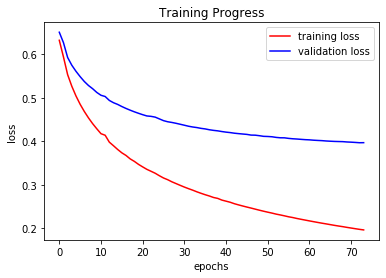

In [56]:
plt.title('Training Progress')
sub_axix = np.arange(len(dev_loss_count))
plt.plot(sub_axix, loss_tr_count, color='red', label='training loss')
plt.plot(sub_axix, dev_loss_count, color='blue', label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Comment:

It is overfitting because the loss of the training data is constantly decreasing but the loss rate of the validation data is remaining about the same.

Compute accuracy, precision, recall and F1-scores:

In [57]:
# fill in your code...
preds_test_vec = predict_class(test_vec, w_count)
print('Accuracy:', accuracy_score(data_test_label,preds_test_vec))
print('Precision:', precision_score(data_test_label,preds_test_vec))
print('Recall:', recall_score(data_test_label,preds_test_vec))
print('F1-Score:', f1_score(data_test_label,preds_test_vec))

Accuracy: 0.8325
Precision: 0.821256038647343
Recall: 0.85
F1-Score: 0.8353808353808354


Finally, print the top-10 words for the negative and positive class respectively.

In [58]:
# fill in your code...
negative_top_10 = []
top_k=-10
top_k_idx=w_count.argsort()[::1][0:-top_k]
for i in range(-top_k):
    negative_top_10 += id_to_word[top_k_idx.tolist()[i]]
print(negative_top_10)

['bad', 'only', 'unfortunately', 'worst', 'script', 'why', 'boring', 'plot', 'any', 'nothing']


In [59]:
# fill in your code...
positive_top_10 = []
top_k=10
top_k_idx=w_count.argsort()[::-1][0:top_k]
for i in range(top_k):
    positive_top_10 += id_to_word[top_k_idx.tolist()[i]]
print(positive_top_10)

['great', 'well', 'also', 'seen', 'fun', 'life', 'many', 'world', 'movies', 'both']


If we were to apply the classifier we've learned into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain?

Provide your answer here...

I don’t think so, because top-10 words for negative and positive contain 'script', 'plot' and 'movies'. They are all words in the domain of movies.

Features like 'great', 'well' , 'bad' can be used in any other new domains for classification.

## Train and Evaluate Logistic Regression with TF.IDF vectors

Follow the same steps as above (i.e. evaluating count n-gram representations).


In [60]:
w_tfidf, trl, devl = SGD(tfidf_train, data_train_label, 
                         X_dev=tfidf_dev, 
                         Y_dev=data_dev_label, 
                         lr=0.0005, 
                         alpha=0.00001, 
                         epochs=100)

Epoch: 0| Training loss: 0.5219880461770563| Validation loss: 0.5969601898547768
Epoch: 1| Training loss: 0.4389610504525999| Validation loss: 0.5523826193286804
Epoch: 2| Training loss: 0.3784549047552951| Validation loss: 0.5190847573220091
Epoch: 3| Training loss: 0.33734551439782984| Validation loss: 0.49654492774903924
Epoch: 4| Training loss: 0.30533901638452987| Validation loss: 0.47875603817242157
Epoch: 5| Training loss: 0.27998761976202224| Validation loss: 0.4650419652229384
Epoch: 6| Training loss: 0.25899052284457685| Validation loss: 0.45388274907946935
Epoch: 7| Training loss: 0.24123637965333788| Validation loss: 0.4447602327192227
Epoch: 8| Training loss: 0.22593381854844485| Validation loss: 0.4366401279060254
Epoch: 9| Training loss: 0.2128115760227552| Validation loss: 0.4297778550718387
Epoch: 10| Training loss: 0.200953172691235| Validation loss: 0.4235473849849918
Epoch: 11| Training loss: 0.1905538053238234| Validation loss: 0.4182836290812558
Epoch: 12| Trainin

Now plot the training and validation history per epoch. Does your model underfit, overfit or is it about right? Explain why.

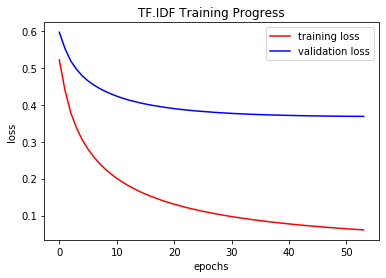

In [61]:
# fill in your code...
plt.title('TF.IDF Training Progress')
sub_axix = np.arange(len(devl))
plt.plot(sub_axix, trl, color='red', label='training loss')
plt.plot(sub_axix, devl, color='blue', label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Comment:

It is about right. Both of them decrese significantly at beginning and become flat at the same time.

Compute accuracy, precision, recall and F1-scores:

In [62]:
# fill in your code...
preds_test_tfidf = predict_class(tfidf_test, w_tfidf)
print('Accuracy:', accuracy_score(data_test_label,preds_test_tfidf))
print('Precision:', precision_score(data_test_label,preds_test_tfidf))
print('Recall:', recall_score(data_test_label,preds_test_tfidf))
print('F1-Score:', f1_score(data_test_label,preds_test_tfidf))

Accuracy: 0.8625
Precision: 0.8502415458937198
Recall: 0.88
F1-Score: 0.8648648648648648


Print top-10 most positive and negative words:

In [63]:
# fill in your code...
negative_top_10 = []
top_k=-10
top_k_idx=w_tfidf.argsort()[::1][0:-top_k]
for i in range(-top_k):
    negative_top_10 += id_to_word[top_k_idx.tolist()[i]]
print(negative_top_10)

['bad', 'worst', 'boring', 'supposed', 'unfortunately', 'waste', 'awful', 'poor', 'script', 'nothing']


In [64]:
# fill in your code...
positive_top_10 = []
top_k=10
top_k_idx=w_tfidf.argsort()[::-1][0:top_k]
for i in range(top_k):
    positive_top_10 += id_to_word[top_k_idx.tolist()[i]]
print(positive_top_10)

['great', 'hilarious', 'fun', 'terrific', 'overall', 'perfectly', 'definitely', 'memorable', 'life', 'simple']


Comment:

Top 10 words got now are more likely to make sense than above. There are more adjective like 'bad', 'worst', 'boring', 'great' showing sentiment

### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

Enter your answer here...

Try learning rate at 0.1 at first, then 0.01 and 0.001.   If 0.001 is too large and 0.0001 too small, I'll try value from 0.0002 to 0.0009 one by one. Finally 0.0005 is appropriate for my model.
Same as learning rate, regularisation strength is devided by 10 each time then find the value just right.

If the learning rate is too low, the model is prone to overfitting and would takes more epochs to converge(low learning rate needs more epochs). If the learning rate is too large, the loss value is easily oscillating.

The alpha hyperparameter has a value between 0.0 and 1.0. This hyperparameter controls the amount of bias in the model from low bias (high variance) to high bias (low variance).
If the regularisation strength is too strong, the model will underestimate the weights and underfit the problem. If the regularisation strength is too weak, the model will be allowed to overfit the training data.



## Full Results

Add here your results:

| LR | Precision  | Recall  | F1-Score  |
|:-:|:-:|:-:|:-:|
| BOW-count  | 0.82  | 0.85  | 0.84  |
| BOW-tfidf  | 0.85  | 0.88  | 0.86  |


# Multi-class Logistic Regression 

Now you need to train a Multiclass Logistic Regression (MLR) Classifier by extending the Binary model you developed above. You will use the MLR model to perform topic classification on the AG news dataset consisting of three classes:

- Class 1: World
- Class 2: Sports
- Class 3: Business

You need to follow the same process as in Task 1 for data processing and feature extraction by reusing the functions you wrote.

In [65]:
# fill in your code...
data_dev = pd.read_csv('./data_topic/dev.csv', names = ['text','label'])
data_test = pd.read_csv('./data_topic/test.csv', names = ['text','label'])
data_train = pd.read_csv('./data_topic/train.csv', names = ['text','label'])

In [66]:
data_train.head()

,text,label
0,1,Reuters - Venezuelans turned out early\and in ...
1,1,Reuters - South Korean police used water canno...
2,1,Reuters - Thousands of Palestinian\prisoners i...
3,1,AFP - Sporadic gunfire and shelling took place...
4,1,AP - Dozens of Rwandan soldiers flew into Suda...


In [67]:
# fill in your code...
data_dev_text = list(data_dev['label'])                  #text to store raw text in python lists 
data_dev_text = [item.lower() for item in data_dev_text] #lower words
data_dev_label = data_dev['text'].values                 #label to store corresponding labels in numpy arrays

data_test_text = list(data_test['label'])   
data_test_text = [item.lower() for item in data_test_text]
data_test_label = data_test['text'].values 

data_train_text = list(data_train['label'])   
data_train_text = [item.lower() for item in data_train_text]
data_train_label = data_train['text'].values 

In [68]:
vocab, df, ngram_counts = get_vocab(data_train_text, ngram_range=(1,3),token_pattern=r'\b[A-Za-z][A-Za-z]+\b', keep_topN=5000, stop_words=stop_words)
print(len(vocab))
print()
print(list(vocab)[:100])
print()
print(df.most_common()[:10])

5000

['reuters', 'said', 'tuesday', 'wednesday', 'new', 'after', 'ap', 'athens', 'monday', 'first', 'two', 'york', 'over', ('new', 'york'), 'us', 'olympic', 'but', 'their', 'will', 'inc', 'more', 'year', 'oil', 'prices', 'company', 'world', 'than', 'aug', 'about', 'had', 'united', 'one', 'out', 'sunday', 'into', 'against', 'up', 'second', 'last', 'president', 'stocks', 'gold', 'team', ('new', 'york', 'reuters'), ('york', 'reuters'), 'when', 'three', 'night', 'time', 'no', 'yesterday', 'games', 'olympics', 'not', 'states', 'greece', 'off', 'iraq', 'washington', 'percent', ('united', 'states'), ('oil', 'prices'), 'home', 'day', 'google', 'public', ('athens', 'reuters'), 'record', 'week', 'men', 'government', 'win', ('said', 'tuesday'), 'american', 'won', 'years', 'all', 'billion', 'shares', 'city', 'offering', 'officials', 'would', 'today', 'final', 'afp', 'gt', 'people', 'lt', 'medal', 'corp', 'sales', 'country', 'back', 'four', 'high', 'investor', 'com', 'minister', 'reported']

[('re

In [69]:
# fill in your code...
word_to_id = {}
id_to_word = {}
for i in range(len(list(vocab))):
    word_to_id[vocab[i]] = i    #word as key
    id_to_word[i] = [vocab[i]]  #id as key
train_ngram = []
for i in range(len(data_train_text)):
    train_ngram.append(extract_ngrams(data_train_text[i], (1,3), r'\b[A-Za-z][A-Za-z]+\b', stop_words,vocab))
test_ngram = []
for i in range(len(data_test_text)):
    test_ngram.append(extract_ngrams(data_test_text[i], (1,3), r'\b[A-Za-z][A-Za-z]+\b', stop_words,vocab))
dev_ngram = []
for i in range(len(data_dev_text)):
    dev_ngram.append(extract_ngrams(data_dev_text[i], (1,3), r'\b[A-Za-z][A-Za-z]+\b', stop_words,vocab))
train_vec = vectorise(train_ngram,vocab)
test_vec = vectorise(test_ngram,vocab)
dev_vec = vectorise(dev_ngram,vocab)

In [70]:
train_vec.shape

(2400, 5000)

In [71]:
train_vec[:2,:50]

array([[1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]])

In [72]:
import math
N = len(train_ngram)
idf = []
[rows, cols] = train_vec.shape
#each element go through col
for j in range(cols):
    n = 0
    for i in range(rows):
        if train_vec[i,j] > 0:
            n += 1
    idf.append(math.log10(N/n))
idfs = np.array(idf)
tfidf_train = train_vec * idfs
tfidf_dev = dev_vec * idfs
tfidf_test = test_vec * idfs

Now you need to change `SGD` to support multiclass datasets. First you need to develop a `softmax` function. It takes as input:

- `z`: array of real numbers 

and returns:

- `smax`: the softmax of `z`

In [73]:
def softmax(z):
    
    # fill in your code...
    sum = np.sum(np.exp(z),axis = 1)                #sum each row
    shape = sum.shape[0]
    smax = np.exp(z) / sum.reshape((shape,1))       #reshape(N,) to (N,1)  ,  N rows
    
    return smax

Then modify `predict_proba` and `predict_class` functions for the multiclass case:

In [74]:
def predict_proba(X, weights):
    
    # fill in your code...
    preds_proba = softmax(np.dot(X , weights))
    
    return preds_proba

In [75]:
def predict_class(X, weights):
    
    # fill in your code...
    preds_class = np.argmax(predict_proba(X, weights),axis = 1) + 1 #b = 1 , axis=1 means argmax in row(N)
    
    return preds_class

Toy example and expected functionality of the functions above:

In [76]:
X = np.array([[0.1,0.2],[0.2,0.1],[0.1,-0.2]])
w = np.array([[2,-5],[-5,2]])

In [77]:
predict_proba(X, w)

array([[0.33181223, 0.66818777],
       [0.66818777, 0.33181223],
       [0.89090318, 0.10909682]])

In [78]:
predict_class(X, w)

array([2, 1, 1])

Now you need to compute the categorical cross entropy loss (extending the binary loss to support multiple classes).

In [79]:
def categorical_loss(X, Y, weights, num_classes=5, alpha=0.00001):
    # X (2400,5000)   weights (5000,3)
    predictions = predict_proba(X, weights)  
    loss = 0
    for i in range(X.shape[0]):
    # prediction(2400,3)
        c=Y[i]-1
    # c means the position representing pridicted class
        loss += -np.log(predictions[i][c])    # -log(yc)  yc means pridicted class c
    l = (loss + alpha * np.sum(weights**2))/len(Y) # l2 regulization
    
    return l
    

Finally you need to modify SGD to support the categorical cross entropy loss:

In [80]:
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], loss="categorical",  num_classes=5, lr=0.01, alpha=0.00001, epochs=5, tolerance=0.001, print_progress=True):

    cur_loss_tr = 1.
    cur_loss_dev = 1.
    training_loss_history = []
    validation_loss_history = []
    #generate an one-hot matrix using for representing label
    #[1,0,0] = class1, [0,1,0] = class2 , [0,0,1] = class3
    one_hot_vector = np.eye(num_classes)
    # initialize w with zeros (5000,3)
    list_weights = []
    for j in range(len(list(vocab))):
        list_weights.append([0.,0.,0.])
    weights = np.array(list_weights)
    #split whole trainging vectors into 10 batch
    iteration = 10
    batch_size = int(len(X_tr)/iteration)
    #epochs
    for i in range(epochs):
        #Randomise the data order after each epoch
        idx = np.arange(len(X_tr))
        np.random.shuffle(idx)
        #iteration
        for j in range(iteration):
            temp_idx = idx[j*batch_size:(j+1)*batch_size]
            temp_label = Y_tr[temp_idx]-1  #Y range(1,3) and we need(0,2)
            temp_data = X_tr[temp_idx]
            #update weights
            predictions = predict_proba(temp_data, weights)
            gradient = np.dot(temp_data.T , predictions - one_hot_vector[temp_label]) +  2*alpha * weights #L2 regularisation
            weights = weights - lr * gradient
        # count loss and document
        cur_loss_tr = categorical_loss(X_tr,Y_tr, weights,alpha)
        cur_loss_dev = categorical_loss(X_dev,Y_dev, weights,alpha)
        training_loss_history.append(cur_loss_tr)
        validation_loss_history.append(cur_loss_dev)
        
        # After each epoch print loss
        print("Epoch: " + str(i) + "| Training loss: " + str(cur_loss_tr) + "| Validation loss: " + str(cur_loss_dev))

        #Stop training if the difference between the current and previous validation loss is smaller than the tolerance
        if i>=1 and validation_loss_history[i-1]-validation_loss_history[i] < tolerance:
            break
        
    return weights, training_loss_history, validation_loss_history

Now you are ready to train and evaluate you MLR following the same steps as in Task 1 for both Count and tfidf features:

In [81]:
w_count, loss_tr_count, dev_loss_count = SGD(train_vec, data_train_label, 
                                             X_dev=dev_vec, 
                                             Y_dev=data_dev_label, 
                                             num_classes = 3,
                                             lr=0.001, 
                                             alpha=0.001, 
                                             epochs=200)

Epoch: 0| Training loss: 0.892420619306114| Validation loss: 0.9768123961634704
Epoch: 1| Training loss: 0.7803428922945191| Validation loss: 0.894276461860083
Epoch: 2| Training loss: 0.7045550236434718| Validation loss: 0.8323634519493182
Epoch: 3| Training loss: 0.6486204663099343| Validation loss: 0.7836689922284901
Epoch: 4| Training loss: 0.6052499591458045| Validation loss: 0.7443984334709948
Epoch: 5| Training loss: 0.5701455463331097| Validation loss: 0.7117819105897565
Epoch: 6| Training loss: 0.5409582930466833| Validation loss: 0.6843487940438348
Epoch: 7| Training loss: 0.5160939791159187| Validation loss: 0.6607226238220931
Epoch: 8| Training loss: 0.49454496942521314| Validation loss: 0.6401522062510623
Epoch: 9| Training loss: 0.4756241027347846| Validation loss: 0.6220457299487958
Epoch: 10| Training loss: 0.458801354116214| Validation loss: 0.6059667270558552
Epoch: 11| Training loss: 0.4437066001361107| Validation loss: 0.5916032507391868
Epoch: 12| Training loss: 0.

Plot training and validation process and explain if your model overfit, underfit or is about right:

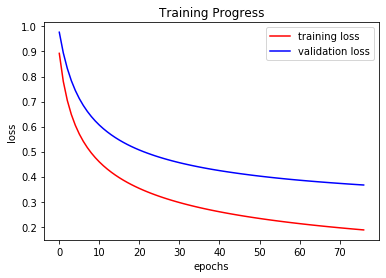

In [82]:
# fill in your code...
plt.title('Training Progress')
sub_axix = np.arange(len(dev_loss_count))
plt.plot(sub_axix, loss_tr_count, color='red', label='training loss')
plt.plot(sub_axix, dev_loss_count, color='blue', label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Comment:

It is about right. Because both training data and validation data are constantly decreasing, the validation loss curve is always above the training loss curve.

Compute accuracy, precision, recall and F1-scores:

In [83]:
# fill in your code...
preds_te = predict_class(test_vec, w_count)
print('Accuracy:', accuracy_score(data_test_label,preds_te))
print('Precision:', precision_score(data_test_label,preds_te,average='macro'))
print('Recall:', recall_score(data_test_label,preds_te,average='macro'))
print('F1-Score:', f1_score(data_test_label,preds_te,average='macro'))

Accuracy: 0.8666666666666667
Precision: 0.8683905948698928
Recall: 0.8666666666666667
F1-Score: 0.8661225967699083


Print the top-10 words for each class respectively.

In [84]:
# fill in your code...
class1_top_10 = []
class2_top_10 = []
class3_top_10 = []
top_k=10
top_k_idx1=w_count[:,0].argsort()[::1][0:top_k]
top_k_idx2=w_count[:,1].argsort()[::1][0:top_k]
top_k_idx3=w_count[:,2].argsort()[::1][0:top_k]
for i in range(top_k):
    class1_top_10 += id_to_word[top_k_idx1.tolist()[i]]
    class2_top_10 += id_to_word[top_k_idx2.tolist()[i]]
    class3_top_10 += id_to_word[top_k_idx3.tolist()[i]]
print(class1_top_10)
print(class2_top_10)
print(class3_top_10)

['when', 'company', ('athens', 'reuters'), 'season', 'business', 'international', 'corp', 'market', 'team', 'july']
['said', 'company', 'oil', 'president', 'government', 'afp', 'prices', 'iraq', ('athens', 'greece'), 'inc']
['ap', 'athens', 'olympic', 'afp', 'sunday', 'monday', 'team', 'olympics', 'win', 'night']


Comment:

Top 10 words got here can clearly represent the text topic.

### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

Explain here...

As I mentioned before, Try learning rate at 0.1 at first, then 0.01 and 0.001.   If 0.001 is too large and 0.0001 too small, I'll try value from 0.0002 to 0.0009 one by one. Finally 0.0005 is appropriate for my model.
Same as learning rate, regularisation strength is devided by 10 each time then find the value just right.

If the learning rate is too low, the model is prone to overfitting and would takes more epochs to converge(low learning rate needs more epochs). If the learning rate is too large, the loss value is easily oscillating.

The alpha hyperparameter has a value between 0.0 and 1.0. This hyperparameter controls the amount of bias in the model from low bias (high variance) to high bias (low variance).
If the regularisation strength is too strong, the model will underestimate the weights and underfit the problem. If the regularisation strength is too weak, the model will be allowed to overfit the training data.

### Now evaluate BOW-tfidf...

In [85]:
w_tfidf, trl, devl = SGD(tfidf_train, data_train_label, 
                         X_dev=tfidf_dev, 
                         Y_dev=data_dev_label, 
                         num_classes = 3,
                         lr=0.0005, 
                         alpha=0.00001, 
                         epochs=100)

Epoch: 0| Training loss: 0.8319251740289062| Validation loss: 0.9383448158659564
Epoch: 1| Training loss: 0.6941520752487773| Validation loss: 0.8371426703685827
Epoch: 2| Training loss: 0.6058614479581282| Validation loss: 0.7656611814093716
Epoch: 3| Training loss: 0.5435600131829741| Validation loss: 0.7120065843095144
Epoch: 4| Training loss: 0.49677191071946025| Validation loss: 0.6700434322022587
Epoch: 5| Training loss: 0.4599606981610325| Validation loss: 0.6362913836628177
Epoch: 6| Training loss: 0.4300106597248875| Validation loss: 0.6084377559565786
Epoch: 7| Training loss: 0.40496367178868686| Validation loss: 0.5848489814689819
Epoch: 8| Training loss: 0.383592069876206| Validation loss: 0.5645833064844927
Epoch: 9| Training loss: 0.3650644035319429| Validation loss: 0.5469260031629272
Epoch: 10| Training loss: 0.34878867545849074| Validation loss: 0.5313828169134653
Epoch: 11| Training loss: 0.33434358371116263| Validation loss: 0.517629464191738
Epoch: 12| Training loss

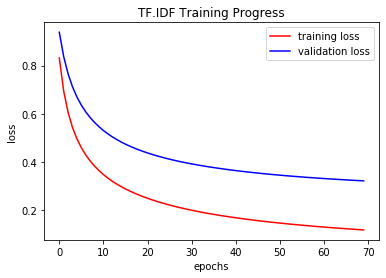

In [86]:
plt.title('TF.IDF Training Progress')
sub_axix = np.arange(len(devl))
plt.plot(sub_axix, trl, color='red', label='training loss')
plt.plot(sub_axix, devl, color='blue', label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

Comment:

It is about right. Both of them decrese significantly at beginning and become flat at the same time.

In [87]:
preds_test_tfidf = predict_class(tfidf_test, w_tfidf)
print('Accuracy:', accuracy_score(data_test_label,preds_test_tfidf))
print('Precision:', precision_score(data_test_label,preds_test_tfidf,average='macro'))
print('Recall:', recall_score(data_test_label,preds_test_tfidf,average='macro'))
print('F1-Score:', f1_score(data_test_label,preds_test_tfidf,average='macro'))

Accuracy: 0.8777777777777778
Precision: 0.8789090515433227
Recall: 0.8777777777777778
F1-Score: 0.877238799813694


In [88]:
class1_top_10 = []
class2_top_10 = []
class3_top_10 = []
top_k=10
top_k_idx1=w_tfidf[:,0].argsort()[::1][0:top_k]
top_k_idx2=w_tfidf[:,1].argsort()[::1][0:top_k]
top_k_idx3=w_tfidf[:,2].argsort()[::1][0:top_k]
for i in range(top_k):
    class1_top_10 += id_to_word[top_k_idx1.tolist()[i]]
    class2_top_10 += id_to_word[top_k_idx2.tolist()[i]]
    class3_top_10 += id_to_word[top_k_idx3.tolist()[i]]
print(class1_top_10)
print(class2_top_10)
print(class3_top_10)

['when', 'company', ('athens', 'reuters'), 'business', 'season', 'market', 'team', 'corp', 'international', 'all']
['company', 'said', 'oil', 'afp', 'president', 'government', 'prices', 'iraq', 'google', 'inc']
['ap', 'athens', 'afp', 'olympic', 'olympics', 'team', 'sunday', 'monday', 'greece', 'night']


Comment:

Top 10 words got here can clearly represent the text topic. There is not much difference between them and above.

## Full Results

Add here your results:

| LR | Precision  | Recall  | F1-Score  |
|:-:|:-:|:-:|:-:|
| BOW-count  | 0.87  | 0.87  | 0.87  |
| BOW-tfidf  | 0.88  | 0.88  | 0.88  |
